## Flood Impacts on Vulnerable Communities in San Diego County

**Part 1: Stephanie Andrade**

*In this notebook we will be analyzing data relevant to flood infrastructure and Census Data in San Diego County.*

**Are low income communities of color in San Diego County disproportionately affected by flood disasters?**


**First, we want to understand who lives in San Diego County? What is the income distribution? This gives us light to the types of resources available in the communities and tracts. So, I will go ahaead an investigate race and median income in the first part of our data analysis.**

*We import our essential data libraries and Census datasets.*

In [1]:
import urllib.request, json 

import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

In [2]:
Income = gpd.read_file('data/Median Income.geojson')

In [3]:
Race = gpd.read_file('data/Race.geojson')

**Quick Census data check.**

In [4]:
Income.shape

(628, 5)

In [5]:
Race.shape

(628, 45)

In [6]:
Income.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,14000US06073000100,"Census Tract 1, San Diego, CA",138879.0,16299.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947..."
1,14000US06073000201,"Census Tract 2.01, San Diego, CA",88125.0,13949.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779..."
2,14000US06073000202,"Census Tract 2.02, San Diego, CA",76658.0,18367.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838..."
3,14000US06073000300,"Census Tract 3, San Diego, CA",68679.0,11872.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684..."
4,14000US06073000400,"Census Tract 4, San Diego, CA",70267.0,16953.0,"MULTIPOLYGON (((-117.17087 32.75865, -117.1701..."


In [7]:
Race.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,14000US06073000100,"Census Tract 1, San Diego, CA",3093.0,364.0,2604.0,223.0,2389.0,216.0,0.0,12.0,...,21.0,39.0,31.0,8.0,14.0,0.0,12.0,8.0,14.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947..."
1,14000US06073000201,"Census Tract 2.01, San Diego, CA",1891.0,158.0,1751.0,164.0,1569.0,165.0,10.0,17.0,...,12.0,35.0,32.0,15.0,25.0,0.0,12.0,15.0,25.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779..."
2,14000US06073000202,"Census Tract 2.02, San Diego, CA",4542.0,401.0,3926.0,423.0,3390.0,456.0,4.0,8.0,...,12.0,68.0,50.0,43.0,54.0,16.0,28.0,27.0,44.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838..."
3,14000US06073000300,"Census Tract 3, San Diego, CA",5239.0,415.0,4368.0,425.0,3820.0,445.0,266.0,171.0,...,17.0,81.0,67.0,66.0,62.0,22.0,34.0,44.0,52.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684..."
4,14000US06073000400,"Census Tract 4, San Diego, CA",3801.0,474.0,2917.0,385.0,2148.0,381.0,228.0,146.0,...,12.0,171.0,127.0,44.0,46.0,0.0,12.0,44.0,46.0,"MULTIPOLYGON (((-117.17087 32.75865, -117.1701..."


**Now we have a better idea of our general datasets. There are a few columns that need some clean up.**

**Both of our datasets are in the same region!**

<AxesSubplot:>

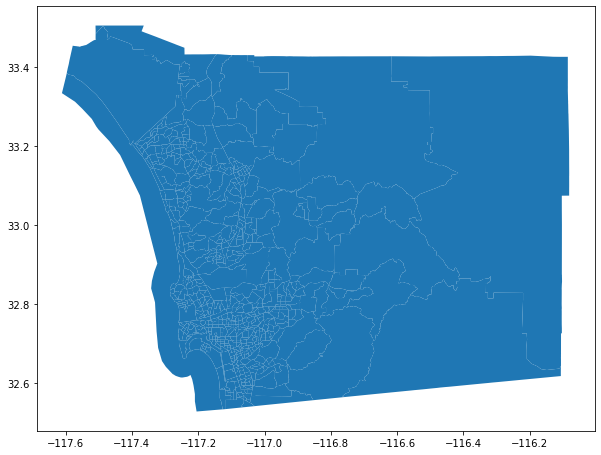

In [8]:
Race.plot(figsize=(10,10))

<AxesSubplot:>

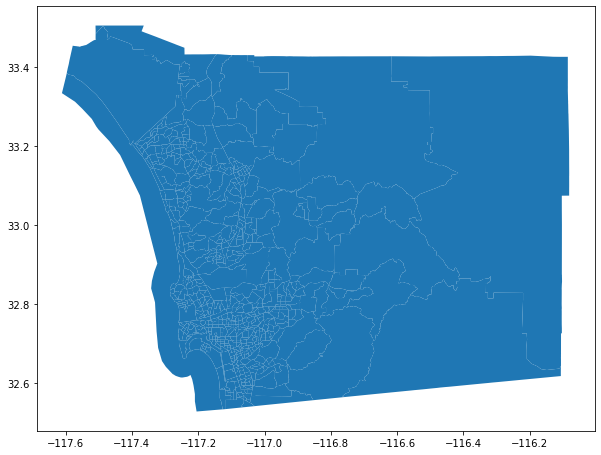

In [9]:
Income.plot(figsize=(10,10))

In [10]:
Income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             628 non-null    object  
 1   name              628 non-null    object  
 2   B19013001         621 non-null    float64 
 3   B19013001, Error  621 non-null    float64 
 4   geometry          628 non-null    geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 24.7+ KB


In [11]:
Race.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             628 non-null    object  
 1   name              628 non-null    object  
 2   B03002001         628 non-null    float64 
 3   B03002001, Error  628 non-null    float64 
 4   B03002002         628 non-null    float64 
 5   B03002002, Error  628 non-null    float64 
 6   B03002003         628 non-null    float64 
 7   B03002003, Error  628 non-null    float64 
 8   B03002004         628 non-null    float64 
 9   B03002004, Error  628 non-null    float64 
 10  B03002005         628 non-null    float64 
 11  B03002005, Error  628 non-null    float64 
 12  B03002006         628 non-null    float64 
 13  B03002006, Error  628 non-null    float64 
 14  B03002007         628 non-null    float64 
 15  B03002007, Error  628 non-null    float64 
 16  B03002008         

In [12]:
Income.geoid.head()

0    14000US06073000100
1    14000US06073000201
2    14000US06073000202
3    14000US06073000300
4    14000US06073000400
Name: geoid, dtype: object

In [13]:
Race.geoid.head()

0    14000US06073000100
1    14000US06073000201
2    14000US06073000202
3    14000US06073000300
4    14000US06073000400
Name: geoid, dtype: object

**Now we want clean up and delete all that unwanted data.**

In [14]:
list(Income)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

In [15]:
columns_to_keep_income = ['geoid','name','B19013001', 'geometry']

In [16]:
Income = Income[columns_to_keep_income]

In [17]:
Income.head()

,geoid,name,B19013001,geometry
0,14000US06073000100,"Census Tract 1, San Diego, CA",138879.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947..."
1,14000US06073000201,"Census Tract 2.01, San Diego, CA",88125.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779..."
2,14000US06073000202,"Census Tract 2.02, San Diego, CA",76658.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838..."
3,14000US06073000300,"Census Tract 3, San Diego, CA",68679.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684..."
4,14000US06073000400,"Census Tract 4, San Diego, CA",70267.0,"MULTIPOLYGON (((-117.17087 32.75865, -117.1701..."


In [18]:
list(Race)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [19]:
columns_to_keep_race = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [20]:
Race = Race[columns_to_keep_race]

In [21]:
Race.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
0,14000US06073000100,"Census Tract 1, San Diego, CA",3093.0,2604.0,2389.0,0.0,0.0,112.0,0.0,0.0,103.0,489.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947..."
1,14000US06073000201,"Census Tract 2.01, San Diego, CA",1891.0,1751.0,1569.0,10.0,11.0,75.0,0.0,0.0,86.0,140.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779..."
2,14000US06073000202,"Census Tract 2.02, San Diego, CA",4542.0,3926.0,3390.0,4.0,0.0,379.0,3.0,0.0,150.0,616.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838..."
3,14000US06073000300,"Census Tract 3, San Diego, CA",5239.0,4368.0,3820.0,266.0,0.0,146.0,7.0,0.0,129.0,871.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684..."
4,14000US06073000400,"Census Tract 4, San Diego, CA",3801.0,2917.0,2148.0,228.0,0.0,430.0,0.0,18.0,93.0,884.0,"MULTIPOLYGON (((-117.17087 32.75865, -117.1701..."


**Renaming Columns**

In [22]:
list(Income)

['geoid', 'name', 'B19013001', 'geometry']

In [23]:
Income.columns = ['geoid', 'name', 'Median Income', 'geometry']

In [24]:
Income.head()

,geoid,name,Median Income,geometry
0,14000US06073000100,"Census Tract 1, San Diego, CA",138879.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947..."
1,14000US06073000201,"Census Tract 2.01, San Diego, CA",88125.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779..."
2,14000US06073000202,"Census Tract 2.02, San Diego, CA",76658.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838..."
3,14000US06073000300,"Census Tract 3, San Diego, CA",68679.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684..."
4,14000US06073000400,"Census Tract 4, San Diego, CA",70267.0,"MULTIPOLYGON (((-117.17087 32.75865, -117.1701..."


In [25]:
list(Race)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [26]:
Race.columns = ['geoid', 'name', 
                  'Total',
                  'Non Hispanic or Latino',
                  'White',
                  'Black',
                  'American Indian and Alaska Native',
                  'Asian',
                  'Native Hawaiian and Other Pacific Islander',
                  'Non Hispanic Some other race',
                  'Non Hispanic Two or more races',
                  'Hispanic',
                  'geometry']
                  

In [27]:
Race.head()

,geoid,name,Total,Non Hispanic or Latino,White,Black,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,14000US06073000100,"Census Tract 1, San Diego, CA",3093.0,2604.0,2389.0,0.0,0.0,112.0,0.0,0.0,103.0,489.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947..."
1,14000US06073000201,"Census Tract 2.01, San Diego, CA",1891.0,1751.0,1569.0,10.0,11.0,75.0,0.0,0.0,86.0,140.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779..."
2,14000US06073000202,"Census Tract 2.02, San Diego, CA",4542.0,3926.0,3390.0,4.0,0.0,379.0,3.0,0.0,150.0,616.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838..."
3,14000US06073000300,"Census Tract 3, San Diego, CA",5239.0,4368.0,3820.0,266.0,0.0,146.0,7.0,0.0,129.0,871.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684..."
4,14000US06073000400,"Census Tract 4, San Diego, CA",3801.0,2917.0,2148.0,228.0,0.0,430.0,0.0,18.0,93.0,884.0,"MULTIPOLYGON (((-117.17087 32.75865, -117.1701..."


In [28]:
Race[Race['Total']==0]

,geoid,name,Total,Non Hispanic or Latino,White,Black,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
238,14000US06073009902,"Census Tract 99.02, San Diego, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-117.23991 32.69564, -117.2398..."
627,14000US06073990100,"Census Tract 9901, San Diego, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-117.61104 33.33413, -117.6086..."


In [29]:
Race_no_pop = Race[Race['Total']==0]

In [30]:
print('There are ' + str(len(Race_no_pop)) + ' census tracts with no people in them')

There are 2 census tracts with no people in them


In [31]:
Race_no_pop[['geoid','Total']]

,geoid,Total
238,14000US06073009902,0.0
627,14000US06073990100,0.0


## Median Income Analysis

In [32]:
random_tract = Income.sample()
random_tract

,geoid,name,Median Income,geometry
415,14000US06073017009,"Census Tract 170.09, San Diego, CA",88235.0,"MULTIPOLYGON (((-117.03666 32.95663, -117.0366..."


<AxesSubplot:ylabel='Frequency'>

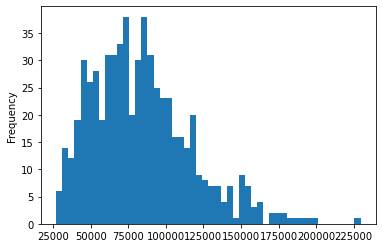

In [33]:
Income['Median Income'].plot.hist(bins=50)

In [34]:
Income['Median Income'].median()

79953.0

**Let us make this a little more visually appealing.**

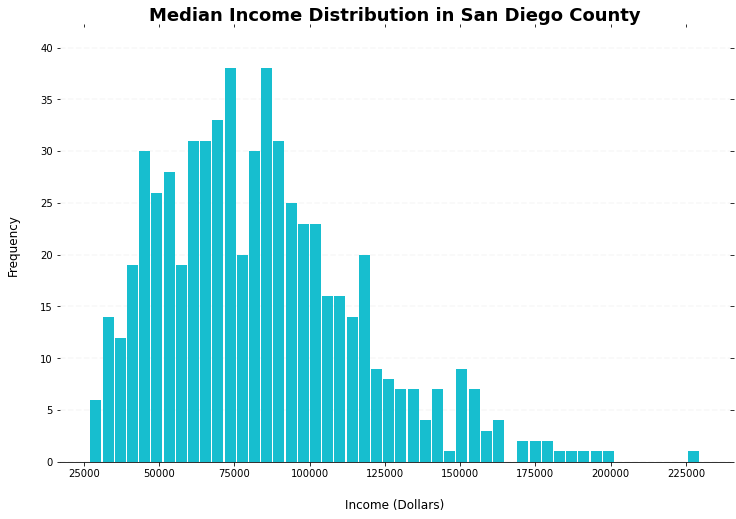

In [35]:
ax = Income.hist(column='Median Income', bins=50, grid=False, figsize=(12,8), color='#17becf', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:
    
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Median Income Distribution in San Diego County", weight='bold', size=18)

    # Set x-axis label
    x.set_xlabel("Income (Dollars)", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, size=12)

In [36]:
Income_sorted = Income.sort_values(by='Median Income',ascending = False)

In [37]:
Income_sorted[['geoid','Median Income']].head(10)

,geoid,Median Income
146,14000US06073008311,229583.0
151,14000US06073008328,199613.0
148,14000US06073008313,194643.0
455,14000US06073017109,192028.0
424,14000US06073017029,186116.0
458,14000US06073017303,182292.0
453,14000US06073017107,180417.0
621,14000US06073021500,177863.0
155,14000US06073008333,175227.0
154,14000US06073008331,173207.0


**The top earning counties in San Diego County.**

<AxesSubplot:>

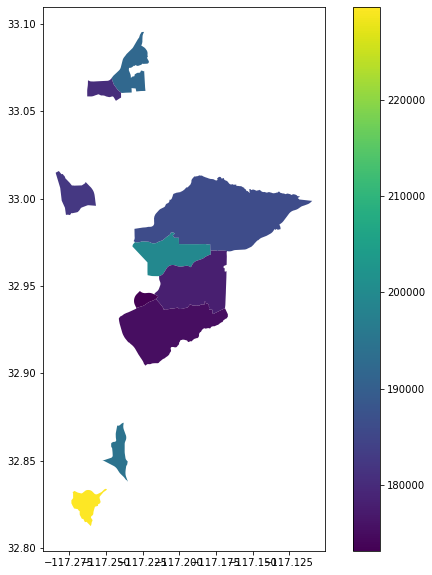

In [38]:
Income_sorted.head(10).plot(figsize=(10,10),column='Median Income',legend=True)

<AxesSubplot:>

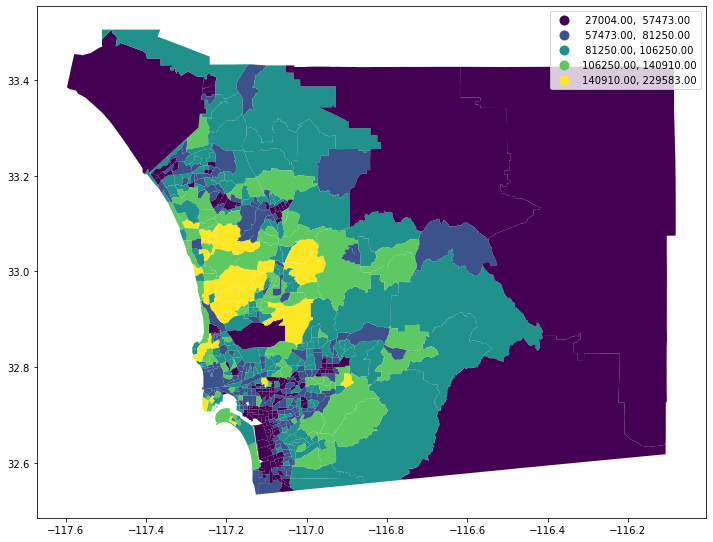

In [39]:
Income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

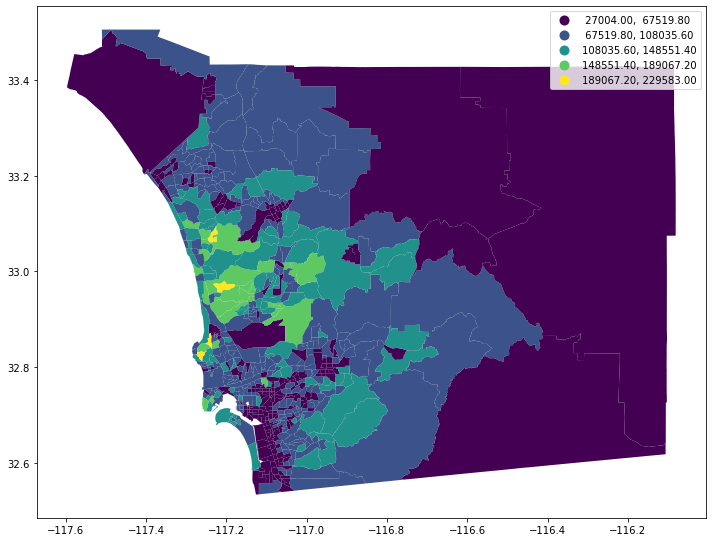

In [40]:
Income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot:>

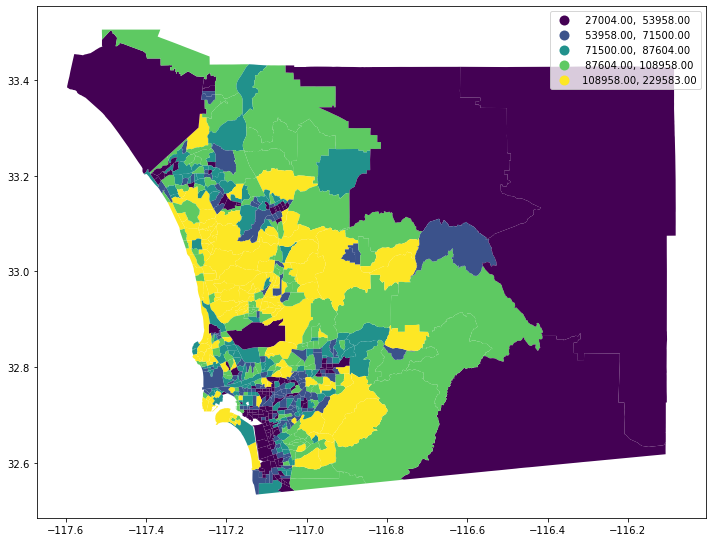

In [41]:
Income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='quantiles')

<AxesSubplot:>

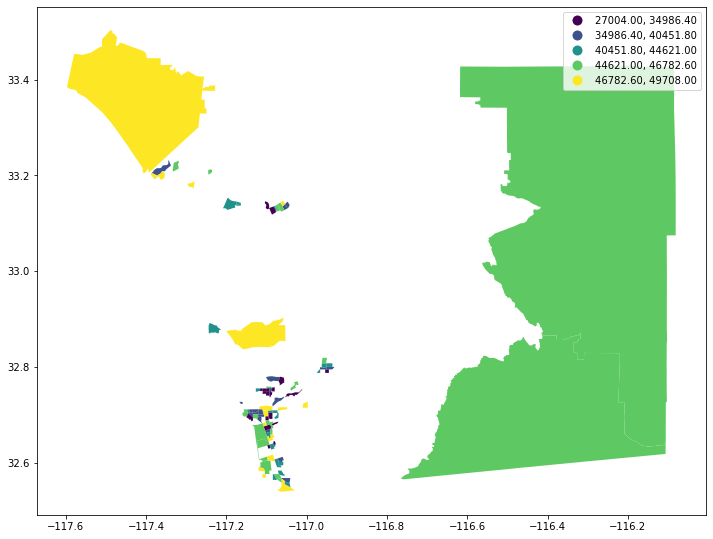

In [42]:
Income[Income['Median Income'] < 50000].plot(figsize=(12,10),column='Median Income',
                 legend=True, 
                 scheme='quantiles')

In [43]:
Income_web_mercator = Income.to_crs(epsg=3857)

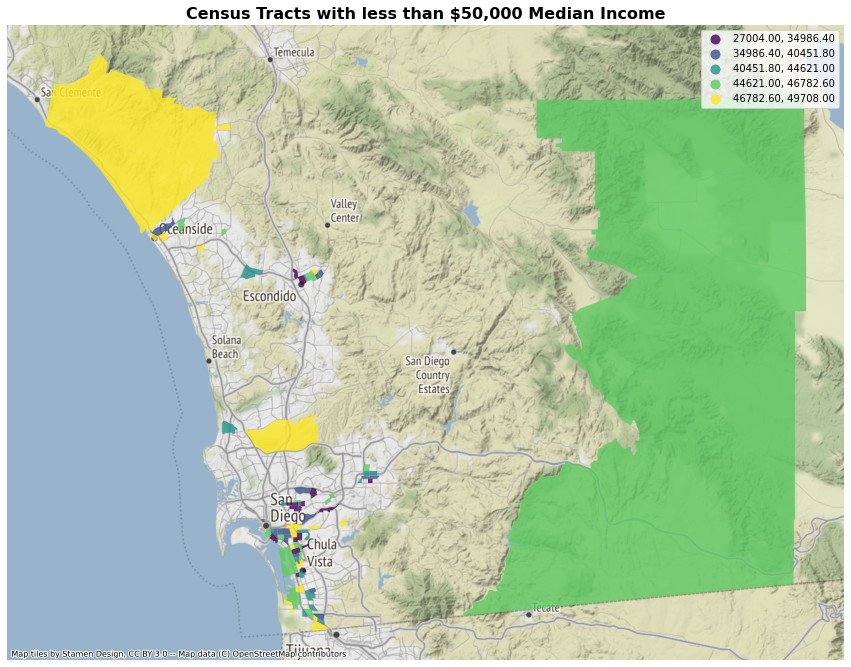

In [44]:
fig, ax = plt.subplots(figsize=(15, 15))

Income_web_mercator[Income_web_mercator['Median Income'] < 50000].plot(ax=ax, alpha=0.8, column='Median Income',
                 legend=True, 
                 scheme='quantiles')

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with less than $50,000 Median Income',fontsize=16, weight='bold')

# add a basemap
ctx.add_basemap(ax)

## Race Analysis

In [45]:
random_tract2 = Race.sample()
random_tract2

,geoid,name,Total,Non Hispanic or Latino,White,Black,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
243,14000US06073010009,"Census Tract 100.09, San Diego, CA",6978.0,461.0,118.0,154.0,0.0,189.0,0.0,0.0,0.0,6517.0,"MULTIPOLYGON (((-117.07110 32.54323, -117.0711..."


#### Race data includes a lot more columns so we need to make sure our clean up did not mess up our entire dataset.

In [46]:
random_tract2.iloc[0]['Total']

6978.0

In [47]:
print('Total population: ' + str(random_tract2.iloc[0]['Total']))

Total population: 6978.0


In [48]:
print('Non Hispanic or Latino + Hispanic: ' + str(random_tract2.iloc[0]['Non Hispanic or Latino'] + random_tract2.iloc[0]['Hispanic']))

Non Hispanic or Latino + Hispanic: 6978.0


In [49]:
Race.head()

,geoid,name,Total,Non Hispanic or Latino,White,Black,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,14000US06073000100,"Census Tract 1, San Diego, CA",3093.0,2604.0,2389.0,0.0,0.0,112.0,0.0,0.0,103.0,489.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947..."
1,14000US06073000201,"Census Tract 2.01, San Diego, CA",1891.0,1751.0,1569.0,10.0,11.0,75.0,0.0,0.0,86.0,140.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779..."
2,14000US06073000202,"Census Tract 2.02, San Diego, CA",4542.0,3926.0,3390.0,4.0,0.0,379.0,3.0,0.0,150.0,616.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838..."
3,14000US06073000300,"Census Tract 3, San Diego, CA",5239.0,4368.0,3820.0,266.0,0.0,146.0,7.0,0.0,129.0,871.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684..."
4,14000US06073000400,"Census Tract 4, San Diego, CA",3801.0,2917.0,2148.0,228.0,0.0,430.0,0.0,18.0,93.0,884.0,"MULTIPOLYGON (((-117.17087 32.75865, -117.1701..."


In [50]:
print(random_tract2.iloc[0]['White'] + 
      random_tract2.iloc[0]['Black'] + 
      random_tract2.iloc[0]['American Indian and Alaska Native'] + 
      random_tract2.iloc[0]['Asian'] + 
      random_tract2.iloc[0]['Native Hawaiian and Other Pacific Islander'] + 
      random_tract2.iloc[0]['Non Hispanic Some other race'] + 
      random_tract2.iloc[0]['Non Hispanic Two or more races'] + 
      random_tract2.iloc[0]['Hispanic'])

6978.0


In [51]:
Race['Total'].head()

0    3093.0
1    1891.0
2    4542.0
3    5239.0
4    3801.0
Name: Total, dtype: float64

In [52]:
Race['Total'].mean()

5280.37101910828

In [53]:
Race['Total'].median()

4880.0

In [54]:
Race['Total'].describe()

count      628.000000
mean      5280.371019
std       2981.074505
min          0.000000
25%       3704.750000
50%       4880.000000
75%       6258.250000
max      38754.000000
Name: Total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

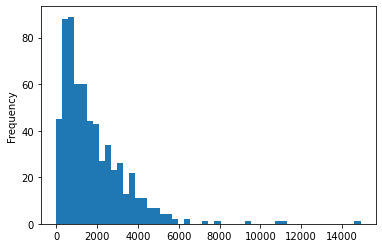

In [55]:
Race['Hispanic'].plot.hist(bins=50)

#### Let's create a cleaner histogram with x and y axis labels.

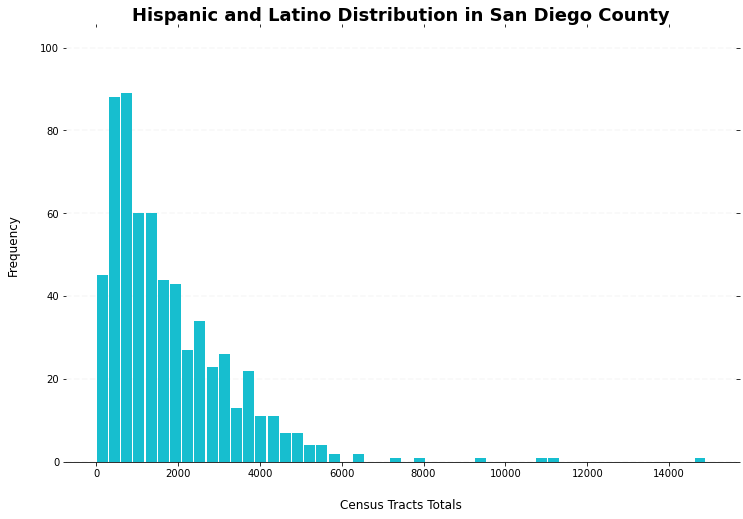

In [56]:
ax = Race.hist(column='Hispanic', bins=50, grid=False, figsize=(12,8), color='#17becf', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:
    
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Hispanic and Latino Distribution in San Diego County", weight='bold', size=18)

    # Set x-axis label
    x.set_xlabel("Census Tracts Totals", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, size=12)

In [57]:
list(Race)

['geoid',
 'name',
 'Total',
 'Non Hispanic or Latino',
 'White',
 'Black',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [58]:
Race['Percent Non Hispanic or Latino'] = Race['Non Hispanic or Latino']/Race['Total']*100

Race['Percent Hispanic'] = Race['Hispanic']/Race['Total']*100

Race['Percent White'] = Race['White']/Race['Total']*100

Race['Percent Black'] = Race['Black']/Race['Total']*100

Race['Percent American Indian and Alaska Native'] = Race['American Indian and Alaska Native']/Race['Total']*100

Race['Percent Native Hawaiian and Other Pacific Islander'] = Race['Native Hawaiian and Other Pacific Islander']/Race['Total']*100

Race['Percent Non Hispanic Some other race'] = Race['Non Hispanic Some other race']/Race['Total']*100

Race['Percent Non Hispanic Two or more races'] = Race['Non Hispanic Two or more races']/Race['Total']*100

In [59]:
Race.head(5)

,geoid,name,Total,Non Hispanic or Latino,White,Black,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Hispanic,geometry,Percent Non Hispanic or Latino,Percent Hispanic,Percent White,Percent Black,Percent American Indian and Alaska Native,Percent Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races
0,14000US06073000100,"Census Tract 1, San Diego, CA",3093.0,2604.0,2389.0,0.0,0.0,112.0,0.0,0.0,...,489.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947...",84.190107,15.809893,77.238927,0.000000,0.000000,0.000000,0.00000,3.330100
1,14000US06073000201,"Census Tract 2.01, San Diego, CA",1891.0,1751.0,1569.0,10.0,11.0,75.0,0.0,0.0,...,140.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779...",92.596510,7.403490,82.971973,0.528821,0.581703,0.000000,0.00000,4.547858
2,14000US06073000202,"Census Tract 2.02, San Diego, CA",4542.0,3926.0,3390.0,4.0,0.0,379.0,3.0,0.0,...,616.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838...",86.437693,13.562307,74.636724,0.088067,0.000000,0.066050,0.00000,3.302510
3,14000US06073000300,"Census Tract 3, San Diego, CA",5239.0,4368.0,3820.0,266.0,0.0,146.0,7.0,0.0,...,871.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684...",83.374690,16.625310,72.914678,5.077305,0.000000,0.133613,0.00000,2.462302
4,14000US06073000400,"Census Tract 4, San Diego, CA",3801.0,2917.0,2148.0,228.0,0.0,430.0,0.0,18.0,...,884.0,"MULTIPOLYGON (((-117.17087 32.75865, -117.1701...",76.742962,23.257038,56.511444,5.998421,0.000000,0.000000,0.47356,2.446725


<AxesSubplot:>

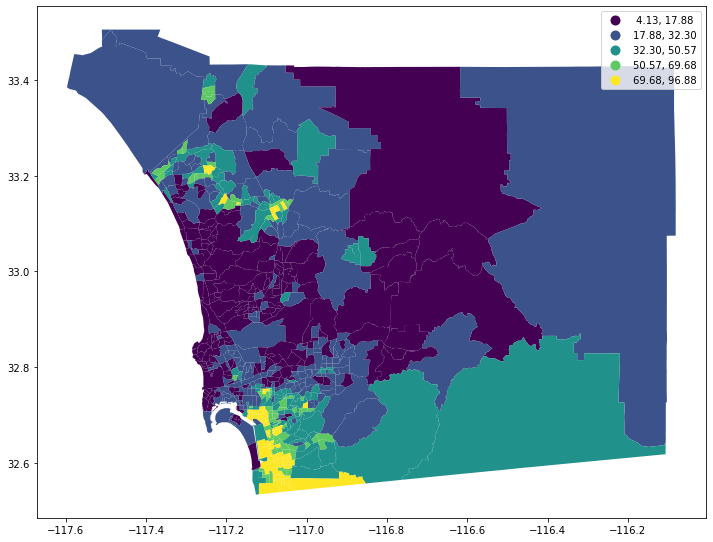

In [60]:
Race.plot(figsize=(12,10),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

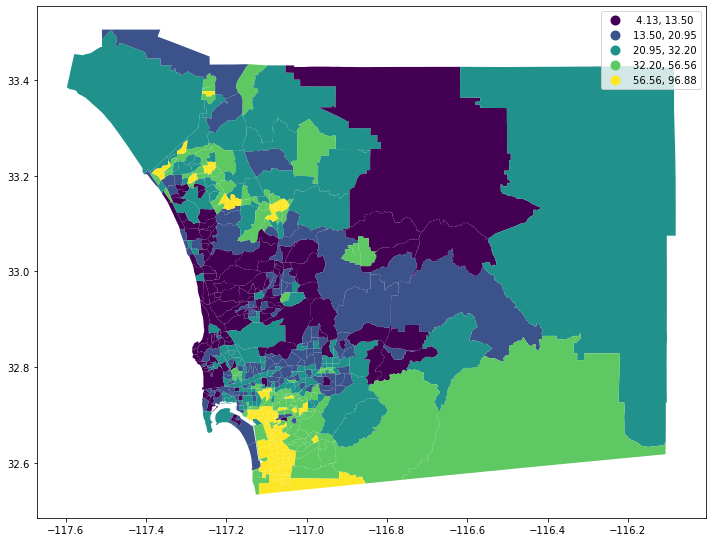

In [61]:
Race.plot(figsize=(12,10),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='Quantiles')

<AxesSubplot:>

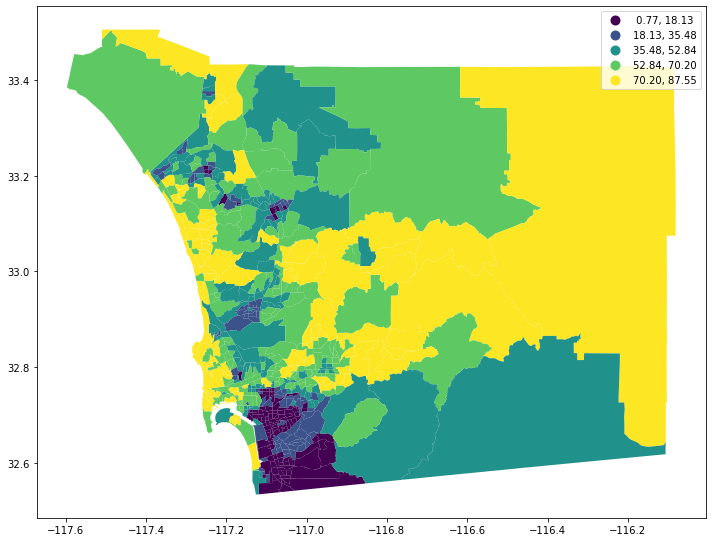

In [62]:
Race.plot(figsize=(12,10),
                 column='Percent White',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot:>

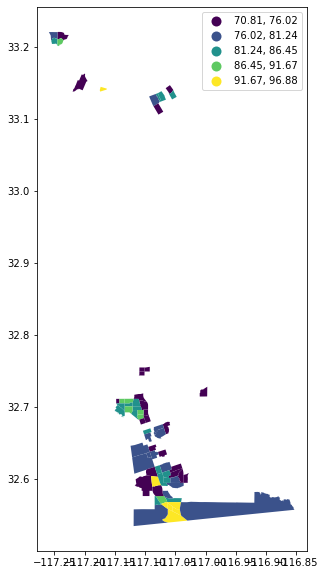

In [63]:
Race[Race['Percent Hispanic'] > 70].plot(figsize=(12,10),column='Percent Hispanic',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot:>

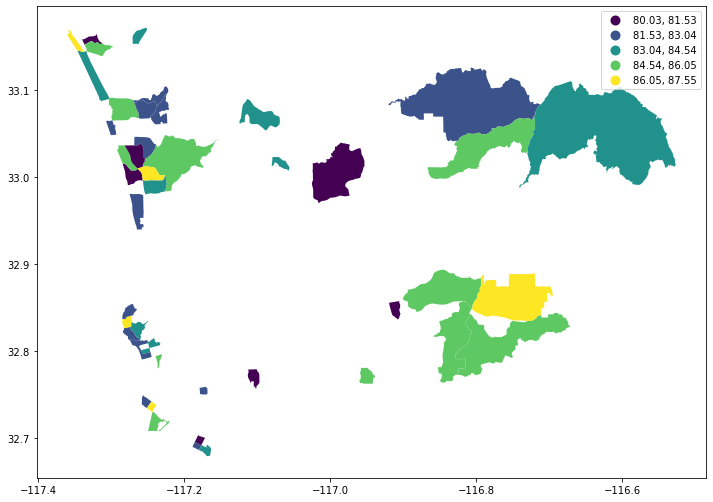

In [64]:
Race[Race['Percent White'] > 80].plot(figsize=(12,10),column='Percent White',
                 legend=True, 
                 scheme='equal_interval')

In [65]:
Race_web_mercator = Race.to_crs(epsg=3857)

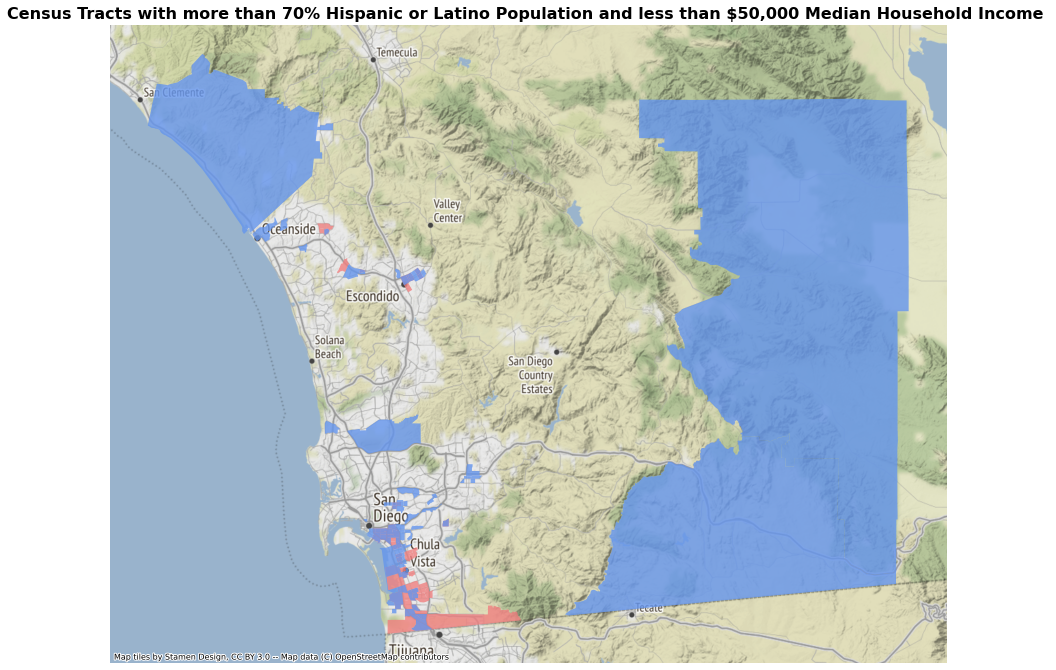

In [66]:
fig, ax = plt.subplots(figsize=(15, 15))

Race_web_mercator[Race_web_mercator['Percent Hispanic'] > 70].plot(ax=ax, alpha=0.8, color='lightcoral')
Income_web_mercator[Income_web_mercator['Median Income'] < 50000].plot(ax=ax, alpha=0.8, color='cornflowerblue')

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 70% Hispanic or Latino Population and less than $50,000 Median Household Income ',fontsize=16, weight='bold')

# add a basemap
ctx.add_basemap(ax)

**This map indicates population ofo more than 70% hispanic that have a household median income of less than $50,000. This map can be a lot better. There are a few thinbgs that limit this data visualization. for instance, how many people in the household? This woul dgive us a more accurate representation of low income communities.**

**LasGroup Responsibilities:**

**Stephanie Andrade**

**For the analysis of Flood Hazards in San Diego County I organized and ran code for Census Reporter Data. This included the outputs of the histograms and map with overlaying race and median income data. I also began and ran the JupyterHub Notebook for our midterm as well as the google doc that would be transferred over to the group github project. I needed to split our Jupyter notebook so Kelly and I will have 2 different notebooks. One includes Census data and the other includes Flood data.**